# Challenge: Optimize Models

While the two packages yield similar accuracy rates, they have very different patterns of error. Play with the models by adding additional features and shrinking the regularization coefficient to see if you can get the accuracy higher than 68%.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

/Users/brandyn/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


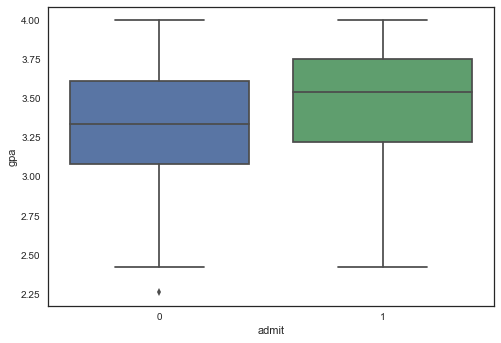

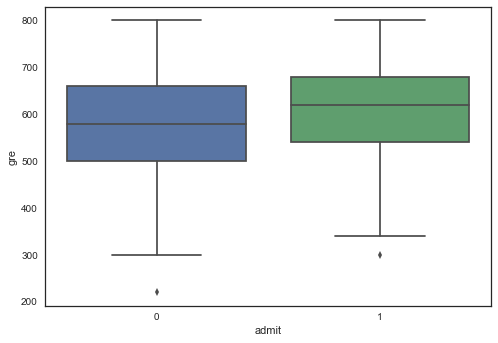

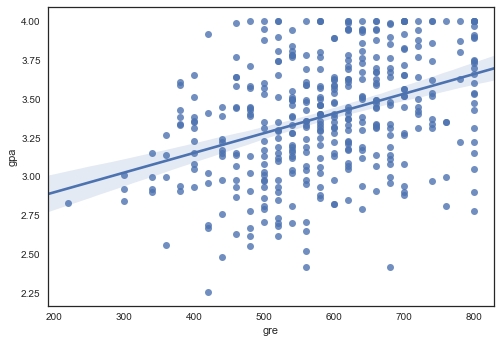

In [2]:
# Read in the data.
df = pd.read_csv("https://www.dropbox.com/s/qhf0ocdqb3gh7ni/logistic_regression.csv?dl=1") 

# Take a peek.
print(df.head())

# Prettier plots are better.
sns.set_style("white")

# Bivariate relationships of predictors to admissions outcome.
sns.boxplot(x="admit", y="gpa", data=df)
plt.show()
sns.boxplot(x="admit", y="gre", data=df)
plt.show()

# Relationship between predictors.
sns.regplot(x='gre', y='gpa', data=df)
plt.show()

### Original

In [3]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gpa', 'gre']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[ 0.74747563  0.00267019]]
[-4.91157158]

 Accuracy by admission status
admit    0    1
row_0          
0      263  118
1       10    9

 Percentage accuracy
0.68


### Model Improvement - reduce C and add another feature

In [4]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1)
y = df['admit']
X = df[['gpa', 'gre','rank']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[ 0.21536348  0.00191587 -0.59840442]]
[-1.18761281]

 Accuracy by admission status
admit    0   1
row_0         
0      258  99
1       15  28

 Percentage accuracy
0.715
